**Description**:

Compute the figure 5 of the article: Types of JM: chew produced during rumination and chew, bite and chew-bite produced during grazing.

-------------------------------------------------------------------------
Author: Luciano Martinez Rau (Mid Sweden University - sinc(<i>i</i>)-CONICET)------------------------------------------------------------------------

In [1]:
import matplotlib.pyplot as plt
import scipy.io
import numpy as np
import os
import getpass

password = getpass.getpass()
command= "sudo -S apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended"
os.system('echo %s | %s' % (password, command))

[sudo] password for luciano: 



Reading package lists...
Building dependency tree...
Reading state information...
cm-super is already the newest version (0.3.4-15).
dvipng is already the newest version (1.15-1.1).
texlive-latex-extra is already the newest version (2019.202000218-1).
texlive-latex-recommended is already the newest version (2019.20200218-1).
0 to upgrade, 0 to newly install, 0 to remove and 147 not to upgrade.
1 not fully installed or removed.
After this operation, 0 B of additional disk space will be used.
Do you want to continue? [Y/n] Abort.


256

**Specify the path of the mat files**

In [2]:
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount('/drive',force_remount=True)
    directory = "/drive/MyDrive/Colab Notebooks/DatabaseMichigan/"
else:
    directory = ''

data_directory = directory + 'data/' 
fig_directory = directory + 'fig/' 

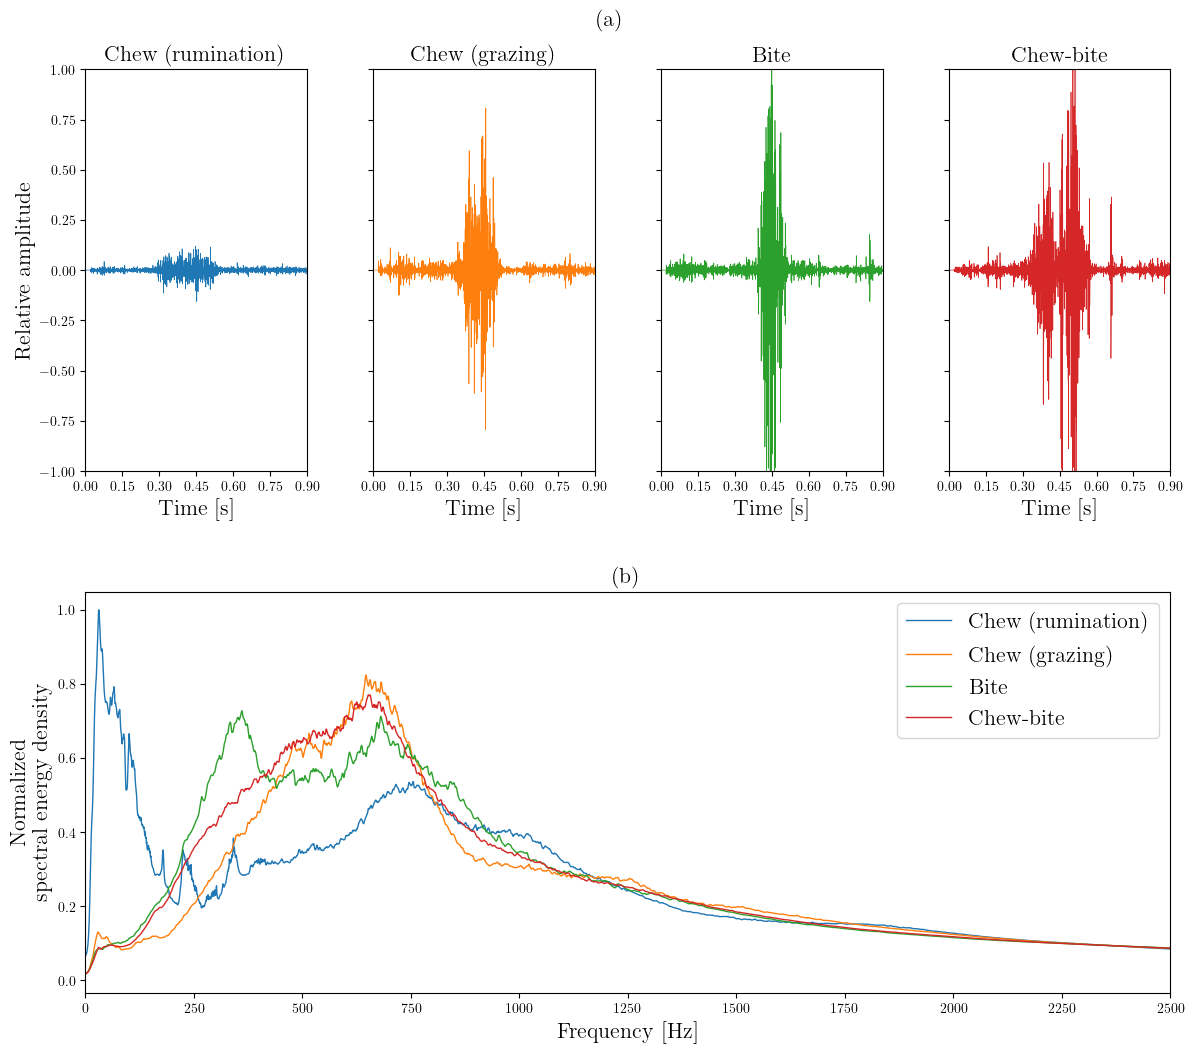

In [30]:
fig = plt.figure()
plt.rcParams['text.usetex'] = True
font = {'family':'serif', 'serif': ['computer modern roman']}
plt.rc('font',**font)
fig.set_figheight(12)
fig.set_figwidth(14)
 
plt.subplots_adjust(hspace=0.3 , wspace=0.3)

ax1 = plt.subplot2grid(shape=(2, 4), loc=(0,0))
ax2 = plt.subplot2grid(shape=(2, 4), loc=(0, 1))
ax3 = plt.subplot2grid(shape=(2, 4), loc=(0, 2))
ax4 = plt.subplot2grid(shape=(2, 4), loc=(0, 3))
ax6 = plt.subplot2grid(shape=(2, 4), loc=(1, 0), colspan=4)


#------------------------WAVEFORM EVENTS-------------------------------------
new_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
              '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
              '#bcbd22', '#17becf']

JM_events={}
scipy.io.loadmat(data_directory + 'JM.mat', mdict = JM_events)
rc=JM_events['rumination_chew']
gc=JM_events['grazing_chew']
b=JM_events['bite']
cb=JM_events['chewbite']

samplerate = 1837.5

t_rc = np.linspace(0, rc.size/samplerate , rc.size)
t_gc = np.linspace(0, gc.size/samplerate , gc.size)
t_b = np.linspace(0, b.size/samplerate , b.size)
t_cb = np.linspace(0, cb.size/samplerate , cb.size)

ax1.plot(t_rc, rc[0],new_colors[0],linewidth=0.5)
ax2.plot(t_gc, gc[0],new_colors[1],linewidth=0.5)
ax3.plot(t_b, b[0],new_colors[2],linewidth=0.5)
ax4.plot(t_cb, cb[0],new_colors[3],linewidth=0.5)

ax1.set_ylim(-1, 1)
ax2.set_ylim(-1, 1)
ax3.set_ylim(-1, 1)
ax4.set_ylim(-1, 1)

ax1.set_xlim(0, 0.9)
ax2.set_xlim(0, 0.9)
ax3.set_xlim(0, 0.9)
ax4.set_xlim(0, 0.9)

ax1.set_xlabel("Time [s]", fontsize=16)
ax2.set_xlabel("Time [s]", fontsize=16)
ax3.set_xlabel("Time [s]", fontsize=16)
ax4.set_xlabel("Time [s]", fontsize=16)
ax1.set_ylabel("Relative amplitude", fontsize=16)

ax1.set_xticks(np.arange(0, rc.size/samplerate, step=0.15))
ax2.set_xticks(np.arange(0, rc.size/samplerate, step=0.15))
ax3.set_xticks(np.arange(0, rc.size/samplerate, step=0.15))
ax4.set_xticks(np.arange(0, rc.size/samplerate, step=0.15))

ax2.axes.set_yticklabels(labels=[])
ax3.axes.set_yticklabels(labels=[])
ax4.axes.set_yticklabels(labels=[])

ax1.title.set_text('Chew (rumination)')
ax2.title.set_text('Chew (grazing)')
ax3.title.set_text('Bite')
ax4.title.set_text('Chew-bite')
ax1.title.set_fontsize(16)
ax2.title.set_fontsize(16)
ax3.title.set_fontsize(16)
ax4.title.set_fontsize(16)


#----------------------------SPECTRUM--------------------------------
espectros={}
scipy.io.loadmat(data_directory + 'spectrum.mat', mdict = espectros)

Fs=44100
N=2**16
f = np.linspace(0, Fs, N)
max_freq = 2500

maximo = max([espectros['max_cfm'][0],
              espectros['max_bfm'][0],
              espectros['max_cbfm'][0],
              espectros['max_rfm'][0]])

ax6.plot(f, espectros['rm'][0]/maximo , linewidth=1.0)
ax6.plot(f, espectros['cm'][0]/maximo , linewidth=1.0)
ax6.plot(f, espectros['bm'][0]/maximo , linewidth=1.0)
ax6.plot(f, espectros['cbm'][0]/maximo , linewidth=1.0)


ax6.set_xlim(left=0, right=max_freq)
ax6.set_xlabel("Frequency [Hz]", fontsize=16)
ax6.set_ylabel("Normalized\nspectral energy density", fontsize=16)

ax6.set_xticks(np.arange(0,max_freq+1, step=250))
ax6.legend(['Chew (rumination)', 'Chew (grazing)','Bite' , 'Chew-bite'],fontsize=16)

fig.suptitle('(a)', fontsize=16,y=0.93)
ax6.set_title('\n(b)', fontsize=16)

plt.savefig(fig_directory + 'fig5.jpg', dpi = 600,transparent=True)
plt.savefig(fig_directory + 'fig5.pdf', dpi = 600,transparent=True)

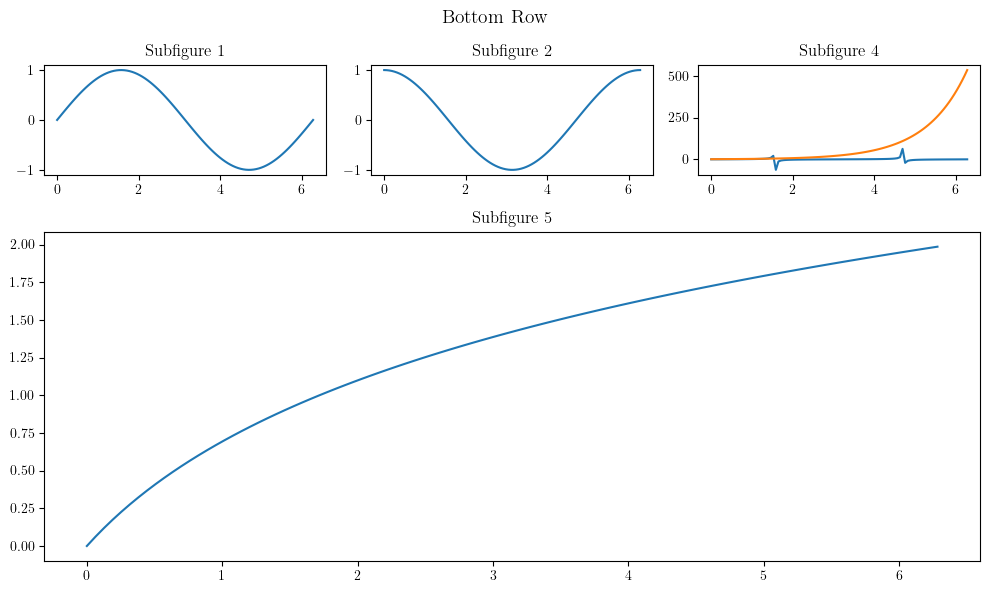

In [15]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np

# Create some sample data for the subfigures
x = np.linspace(0, 2 * np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.tan(x)
y4 = np.exp(x)
y5 = np.log(x + 1)

# Create the main figure
fig = plt.figure(figsize=(10, 6))
gs = GridSpec(2, 3, width_ratios=[1, 1, 1], height_ratios=[1, 3])

# Top row (four subfigures)
ax1 = plt.subplot(gs[0, 0])
ax1.plot(x, y1)
ax1.set_title('Subfigure 1')

ax2 = plt.subplot(gs[0, 1])
ax2.plot(x, y2)
ax2.set_title('Subfigure 2')

ax3 = plt.subplot(gs[0, 2])
ax3.plot(x, y3)
ax3.set_title('Subfigure 3')

ax4 = plt.subplot(gs[0, 2])
ax4.plot(x, y4)
ax4.set_title('Subfigure 4')

# Add title to the top row
fig.suptitle('Top Row', fontsize=14)

# Bottom row (one subfigure spanning the space of three)
ax5 = plt.subplot(gs[1, :])
ax5.plot(x, y5)
ax5.set_title('Subfigure 5')

# Add title to the bottom row
fig.suptitle('Bottom Row', fontsize=14)

# Adjust spacing between subfigures
plt.tight_layout()

# Display the figure
plt.show()
